## Installing dependencies

In [5]:
!pip install tensorflow_decision_forests

In [1]:
!pip install scikit-learn

### Importing the modules needed

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Data

In [4]:
data = sns.load_dataset('penguins')

In [5]:
data.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [6]:
data.dropna(inplace=True)

In [7]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [9]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

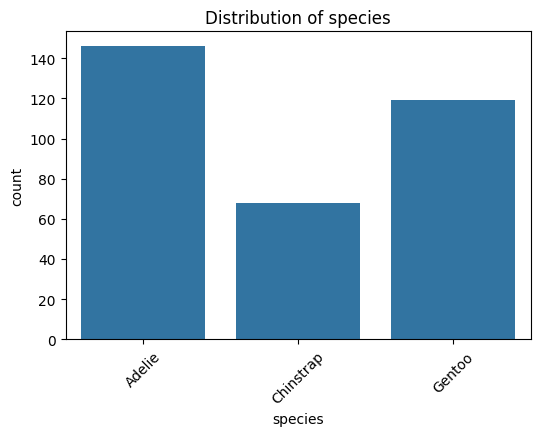

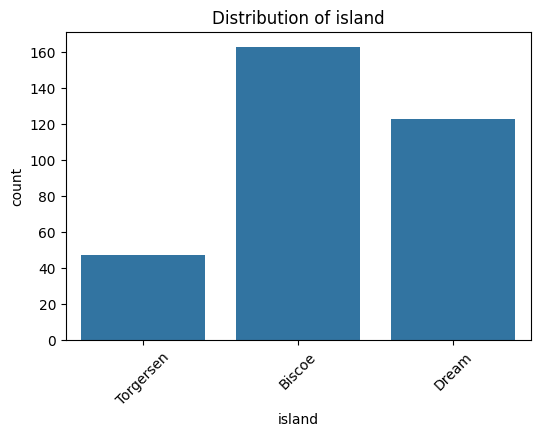

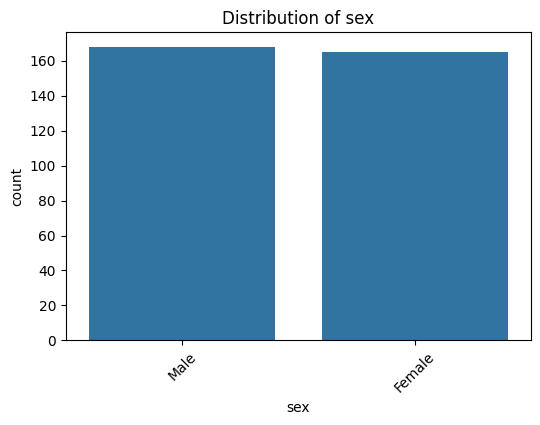

In [10]:
#Plotting each categorical variable
for col in categorical_cols:
  plt.figure(figsize=(6,4))
  sns.countplot(data=data, x=col)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45)

In [12]:
numeric_features = data.select_dtypes(include=['float64', 'int']).columns.difference(['species'])

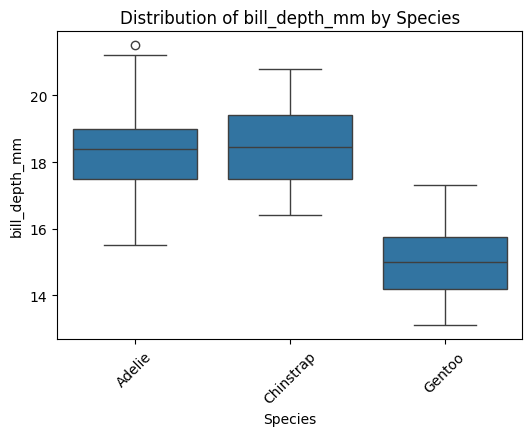

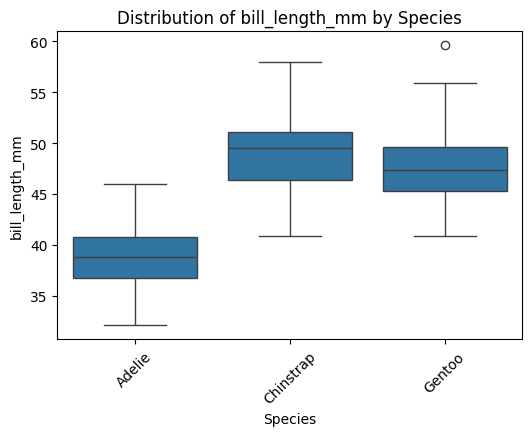

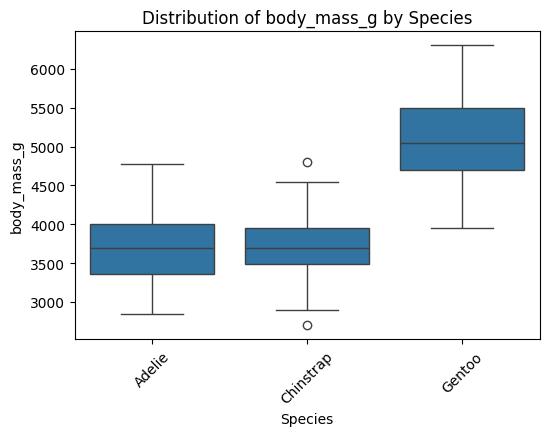

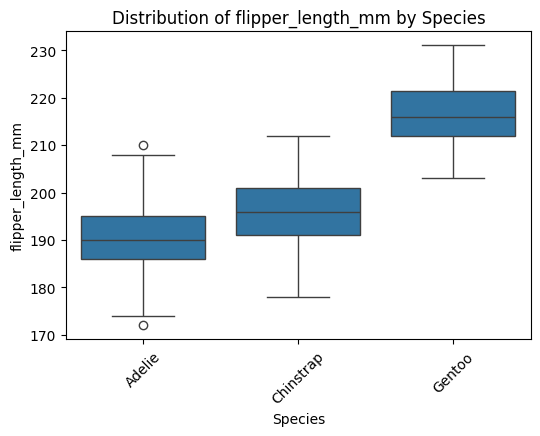

In [14]:
for feature in numeric_features:
  plt.figure(figsize=(6,4))
  sns.boxplot(x='species', y=feature, data=data)
  plt.title(f'Distribution of {feature} by Species')
  plt.xlabel('Species')
  plt.ylabel(feature)
  plt.xticks(rotation=45)
  plt.show()


In [16]:
#Create separate label encoders for each categorical variable
species_encoder = LabelEncoder()
island_encoder = LabelEncoder()
sex_encoder = LabelEncoder()

#Encode each categorical variable
data['species'] = species_encoder.fit_transform(data['species'])
data['island'] = island_encoder.fit_transform(data['island'])
data['sex'] = sex_encoder.fit_transform(data['sex'])

species_mapping = dict(zip(species_encoder.classes_, range(len(species_encoder.classes_))))
island_mapping = dict(zip(island_encoder.classes_, range(len(island_encoder.classes_))))
sex_mapping = dict(zip(sex_encoder.classes_, range(len(sex_encoder.classes_))))

In [17]:
# Split data into training and testing
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Convert to TensorFlow dataset
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label='species')
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label='species')

# Create and train the model
model = tfdf.keras.RandomForestModel()
model.fit(train_ds, verbose=2)

Use /tmp/tmp77ygod1r as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'island': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'bill_length_mm': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'bill_depth_mm': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'flipper_length_mm': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'body_mass_g': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'sex': <tf.Tensor 'data_5:0' shape=(None,) dtype=int64>}
Label: Tensor("data_6:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'island': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'bill_length_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'bill_depth_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'flipper_length_mm':

I0000 00:00:1750272774.751453    2087 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1750272774.753868    2087 kernel.cc:783] Collect training examples
I0000 00:00:1750272774.753896    2087 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1750272774.759071    2087 kernel.cc:401] Number of batches: 1
I0000 00:00:1750272774.759117    2087 kernel.cc:402] Number of examples: 233
I0000 00:00:1750272774.764668    2087 kernel.cc:802] Training dataset:
Number of records: 233
Number of columns: 7

Number of columns by type:
	NUMERICAL: 6 (85.7143%)
	CATEGORICAL: 1 (14.2857%)

Columns:

NUMERICAL: 6 (85.7143%)
	1: "bill_depth_mm" NUMERICAL m

Model trained in 0:00:00.223176
Compiling model...
Model compiled.


In [18]:
from re import I
# Get an inspector to access model internals
inspector = model.make_inspector()

# Display feature importances
importance_types = inspector.variable_importances().keys()

for importance_type in importance_types:
  print("\n")
  print(f'Importance Type: {importance_type}')
  importances = inspector.variable_importances()[importance_type]
  #Sort importances in descending order based on importance value
  sorted_importances = sorted(importances, key=lambda x: x[1], reverse=True)
  #Set up formatting for consisten spacing in the output
  for feature, importance in sorted_importances:
    # Ensure the feature is treated as a string
    feature_name = feature.name if isinstance(feature, tfdf.py_tree.dataspec.SimpleColumnSpec) else feature
    print(f'{feature_name:20} {importance:.4f}')



Importance Type: INV_MEAN_MIN_DEPTH
bill_depth_mm        0.4227
bill_length_mm       0.4119
flipper_length_mm    0.3735
island               0.3060
body_mass_g          0.2759
sex                  0.2452


Importance Type: NUM_AS_ROOT
bill_depth_mm        143.0000
flipper_length_mm    115.0000
bill_length_mm       41.0000
body_mass_g          1.0000


Importance Type: SUM_SCORE
bill_length_mm       23859.0603
bill_depth_mm        21419.3378
flipper_length_mm    16734.7522
island               6425.7241
body_mass_g          2557.7010
sex                  303.6369


Importance Type: NUM_NODES
bill_length_mm       630.0000
bill_depth_mm        348.0000
body_mass_g          302.0000
flipper_length_mm    267.0000
island               245.0000
sex                  30.0000


In [22]:
#Get predictions for the test data
test_predictions = model.predict(test_ds)
predicted_labels = np.argmax(test_predictions, axis=1)

test_labels = test_data['species'].values

#Compute accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

#Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print("\nConfusion Matrix: ")
print(conf_matrix)

#Calculate and print classification report
species_names = species_encoder.classes_
report = classification_report(test_labels, predicted_labels)
print("\nClassification Report:")
print(report)


1/1 [==============================] - 0s 56ms/step
Accuracy: 0.99

Confusion Matrix: 
[[48  0  0]
 [ 1 17  0]
 [ 0  0 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

